# ISEL - Aprendizagem Automática(AA)
## Semestre de Inverno 2025/26
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>

Trabalho realizado por:
* <b>Ruben Zhang, número 51388 </b>
* <b>Sofia Salgado, número 51694 </b>
* <b>RANDOM , número ---------------------------------------- </b>


<b> Turma 51D - Docente: Gonçalo Marques </b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.spatial.distance import mahalanobis, cityblock, euclidean, cosine

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, precision_recall_curve,
    auc, precision_score, recall_score)

from sklearn.preprocessing import StandardScaler

from sklearn.svm  import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


Objetivos:
1. Obter e ler a informação do ficheiro pickle
2. Normalizar os valores obtidos
3. Verificar a vantagem da normalização dos dados
4. Escolher dois classificadores binarios
5. Treinar os classificadores
6. Testar os classificadores
7. Avaliar os classificadores com base em métricas, calibando caso se verifique necessário
8. Realizar um estudo comparativo dos desempenho dos diferentes classificadores

Forma da matriz de X (8, 768)
Forma da matriz de Y (1, 768)


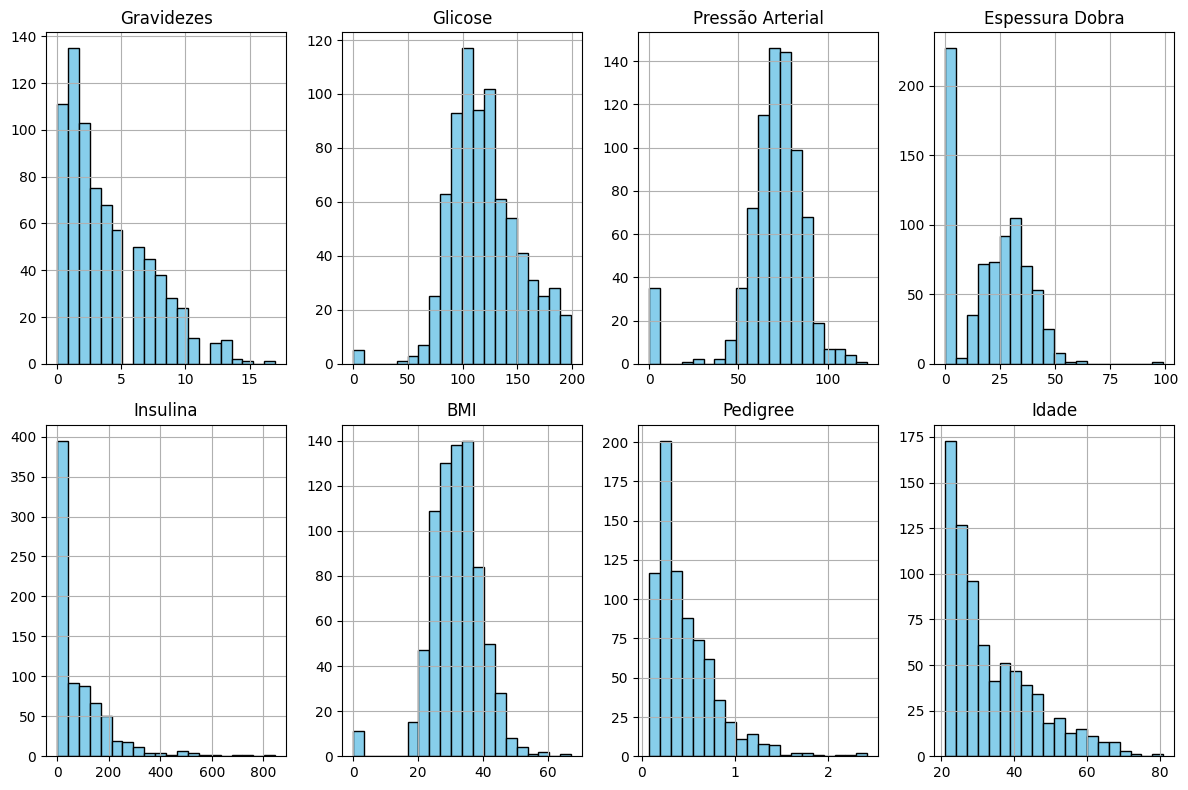

Médias (devem ser 0): [-7.74843153e-17  3.61400724e-18 -1.32724416e-17  7.76288755e-17
 -5.49329101e-17  2.97273780e-15  1.92438658e-15  2.19297959e-16]
Desvios padrão (devem ser 1): [1. 1. 1. 1. 1. 1. 1. 1.]
----------------------------------------
Classificador RandomForest
Acertos no teste: 75.32467532467533 %
Matriz de confusão:
 [[130  20]
 [ 37  44]]
----------------------------------------
ClassificadorLogisticRegression
Probabilidade de acertos: 74.5%
matriz de confusão [[130  20]
 [ 39  42]]
----------------------------------------
Classificador KNNVizinhos
Probabilidade de acertos: 71.4%
matriz de confusão [[125  25]
 [ 41  40]]
----------------------------------------
Classificador SVM
Probabilidade de acertos: 74.9%
matriz de confusão [[129  21]
 [ 37  44]]


In [2]:
with open("pimaDiabetes.p", "rb") as f:
    data = pickle.load(f)

X = data.data.T  # Matriz de features, ou seja os 8 atributos médicos
Y = data.target  # Índices das classes, ou seja, o resultado esperado(saida) se tem diabetes(1) ou não(0), que se prenche
Yn = Y[np.newaxis, :]


def Grafico_IntervaloValores_Features():
    feature_names = ["Gravidezes", "Glicose", "Pressão Arterial", "Espessura Dobra", "Insulina", "BMI", "Pedigree",
                     "Idade"]
    plt.figure(figsize=(12, 8))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.grid()
        plt.hist(X[i, :], bins=20, color='skyblue', edgecolor='black')
        plt.title(feature_names[i])
    plt.tight_layout()
    plt.show()


#X é 768 amostras por 8 features
print("Forma da matriz de X", X.shape)
print("Forma da matriz de Y", Yn.shape)
Grafico_IntervaloValores_Features()

media = np.mean(X, axis=1)
variancia = np.var(X, axis=1)
covariancia = np.cov(X)


# Print
# print("Média (np.mean):", media)
# print("Variância de X:", variancia)
# print("Covariancia de X:", covariancia)


def Normaliza_Dados(Manual=False):
    if Manual:  #media 0 e desvio padra de forma manual
        Xn = X - media[:, np.newaxis]
        print("Shape de Xn:", Xn.shape)
        print("Média dos dados centralizados:", np.mean(Xn, axis=1))

    else:
        #Normalização dos dados de forma automatica
        scaler = StandardScaler()
        Xn = scaler.fit_transform(X.T).T
        print("Médias (devem ser 0):", np.mean(Xn, axis=1))
        print("Desvios padrão (devem ser 1):", np.std(Xn, axis=1))
    return Xn


def SepararDadosTreinoTeste(Xn, y, TesteSize, RandomState):
    XTrain, XTest, YTrain, YTest = train_test_split(Xn, y, test_size=TesteSize, random_state=RandomState, stratify=y)

    return XTrain, XTest, YTrain, YTest


def TreinarRandomForest(Xn, y):
    print("--" * 20)
    print("Classificador RandomForest")

    Xn = Xn.T
    XTrain, XTest, YTrain, YTest = SepararDadosTreinoTeste(Xn, y, 0.3, 42)
    RF = RandomForestClassifier(random_state=42).fit(XTrain, YTrain)
    print("Acertos no teste:", RF.score(XTest, YTest) * 100, "%")
    YPredict = RF.predict(XTest)
    print("Matriz de confusão:\n", confusion_matrix(YTest, YPredict))


def TreinarLogisticRegression(Xn, y):
    print("--" * 20)
    print("ClassificadorLogisticRegression")

    Xn = Xn.T
    XTrain, XTest, YTrain, YTest = SepararDadosTreinoTeste(Xn, y, 0.3, 42)
    LogReg = LogisticRegression(max_iter=10000).fit(XTrain, YTrain)
    accuracy = LogReg.score(XTest, YTest) * 100
    print(f"Probabilidade de acertos: {accuracy:.1f}%")
    YPredict = LogReg.predict(XTest)
    cf = confusion_matrix(YTest, YPredict)
    print("matriz de confusão", cf)


def TreinarKNNVizinhos(Xn, y):
    print("--" * 20)
    print("Classificador KNNVizinhos")

    Xn = Xn.T

    XTrain, XTest, YTrain, YTest = SepararDadosTreinoTeste(Xn, y, 0.3, 42)
    KNN = KNeighborsClassifier(n_neighbors=5).fit(XTrain, YTrain)
    accuracy = KNN.score(XTest, YTest) * 100
    print(f"Probabilidade de acertos: {accuracy:.1f}%")
    YPredict = KNN.predict(XTest)
    cf = confusion_matrix(YTest, YPredict)
    print("matriz de confusão", cf)


def TreinarSVM(Xn, y):
    print("--" * 20)
    print("Classificador SVM")

    Xn = Xn.T
    XTrain, XTest, YTrain, YTest = SepararDadosTreinoTeste(Xn, y, 0.3, 42)
    SVM = SVC().fit(XTrain, YTrain)
    accuracy = SVM.score(XTest, YTest) * 100
    print(f"Probabilidade de acertos: {accuracy:.1f}%")
    YPredict = SVM.predict(XTest)
    cf = confusion_matrix(YTest, YPredict)
    print("matriz de confusão", cf)

Xn = Normaliza_Dados()
TreinarRandomForest(Xn, Y)
TreinarLogisticRegression(Xn, Y)
TreinarKNNVizinhos(Xn, Y)
TreinarSVM(Xn, Y)
Xn = Xn.T
XTrain, XTest, YTrain, YTest = SepararDadosTreinoTeste(Xn, Y, 0.3, 42)

In [ ]:


#permite determinar de acordo com os dados automcaticamente os melhores classificadores e com os melhores parametros(CHATGPT)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(XTrain, YTrain)
best_model = grid.best_estimator_
print(best_model)
print("Melhores parâmetros:", grid.best_params_)
print("Melhor accuracy média (CV):", grid.best_score_)
best_model.fit(XTrain, YTrain)
accuracy_test = best_model.score(XTest, YTest)
print("Accuracy no conjunto de teste:", accuracy_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def Avaliar_Classificadores(Xn, Y):
    print("\n" + "="*60)
    print("🏁 Avaliação comparativa dos classificadores")
    print("="*60)

    # Garante que X está na forma correta (768 amostras x 8 features)
    if Xn.shape[0] < Xn.shape[1]:
        Xn = Xn.T

    # Divide os dados em treino e teste
    XTrain, XTest, YTrain, YTest = train_test_split(
        Xn, Y, test_size=0.3, random_state=42, stratify=Y
    )

    # Dicionário com os classificadores a avaliar
    classificadores = {
        "RandomForest": RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
        "LogisticRegression": LogisticRegression(max_iter=10000, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5)
    }

    # Lista para armazenar resultados
    resultados = []

    # Avalia cada classificador
    for nome, modelo in classificadores.items():
        modelo.fit(XTrain, YTrain)
        YPred = modelo.predict(XTest)
        YProb = modelo.predict_proba(XTest)[:, 1] if hasattr(modelo, "predict_proba") else None

        # Calcula métricas
        accuracy = accuracy_score(YTest, YPred)
        precision = precision_score(YTest, YPred)
        recall = recall_score(YTest, YPred)
        f1 = f1_score(YTest, YPred)
        auc = roc_auc_score(YTest, YProb) if YProb is not None else None

        resultados.append({
            "Classificador": nome,
            "Accuracy": round(accuracy, 3),
            "Precisão": round(precision, 3),
            "Recall": round(recall, 3),
            "F1-Score": round(f1, 3),
            "AUC": round(auc, 3) if auc is not None else "N/A"
        })

    # Cria um DataFrame com os resultados
    df_resultados = pd.DataFrame(resultados)
    print("\nResultados comparativos:")
    print(df_resultados)

    # Retorna a tabela para análise posterior (opcional)
    return df_resultados

Avaliar_Classificadores(Xn, Y)


🏁 Avaliação comparativa dos classificadores

Resultados comparativos:
        Classificador  Accuracy  Precisão  Recall  F1-Score    AUC
0        RandomForest     0.758     0.719   0.506     0.594  0.833
1  LogisticRegression     0.745     0.677   0.519     0.587  0.838
2                 KNN     0.714     0.615   0.494     0.548  0.757


,Classificador,Accuracy,Precisão,Recall,F1-Score,AUC
0,RandomForest,0.758,0.719,0.506,0.594,0.833
1,LogisticRegression,0.745,0.677,0.519,0.587,0.838
2,KNN,0.714,0.615,0.494,0.548,0.757
